## Práctica - Fundamentos de las Ciencias de Datos

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importación de datasets relacionados a madres, sus hijos y características de gestaciones**

In [108]:
data_nac = pd.read_csv(r'C:\Users\icrui\Documents\DS-ML\FCEIA\3° cuatrimestre\Fundamentos_Cs_Datos\Practica_Gestacion\nacimientos.csv', sep=';', skiprows=3)

In [110]:
data_mad = pd.read_excel(r'C:\Users\icrui\Documents\DS-ML\FCEIA\3° cuatrimestre\Fundamentos_Cs_Datos\Practica_Gestacion\datos_madres.xlsx')

**Limpieza inicial**

In [112]:
data_nac.isna().sum()

id_madre         0
peso_kg_bebe     0
semanas_gest     0
edad_anios       0
hijos_previos    0
dtype: int64

In [114]:
data_nac = data_nac.rename(columns={'id_madre':'id'})

In [116]:
data_mad = data_mad.rename(columns=dict(zip(data_mad.columns, data_mad.columns.str.lower())))

In [118]:
data_mad.isna().sum()

id                     0
altura_m_mujer         0
peso_kg_mujer          0
num_cigarrillos_dia    0
dtype: int64

In [120]:
data_mad['altura_m_mujer'] = data_mad['altura_m_mujer'].str.replace(",", ".")

In [122]:
data_mad['altura_m_mujer'] = data_mad['altura_m_mujer'].astype('float')

**Se unen datasets**

In [124]:
data = pd.merge(data_mad, data_nac, on='id', how='inner')

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   345 non-null    int64  
 1   altura_m_mujer       345 non-null    float64
 2   peso_kg_mujer        345 non-null    float64
 3   num_cigarrillos_dia  345 non-null    int64  
 4   peso_kg_bebe         345 non-null    float64
 5   semanas_gest         345 non-null    float64
 6   edad_anios           345 non-null    int64  
 7   hijos_previos        345 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 21.7 KB


Ejercicio 2. Considerando que el Índice de Masa Corporal (IMC) se define como el peso de una
persona en kilogramos dividido por el cuadrado de la estatura en metros, represente
gráficamente la distribución de dicha variable para las mujeres del dataset. En base al gráfico
realizado, ¿cómo caracterizaría su distribución en relación a la simetría?

In [151]:
data['imc_madre'] = data['peso_kg_mujer']/((data['altura_m_mujer'])**2)

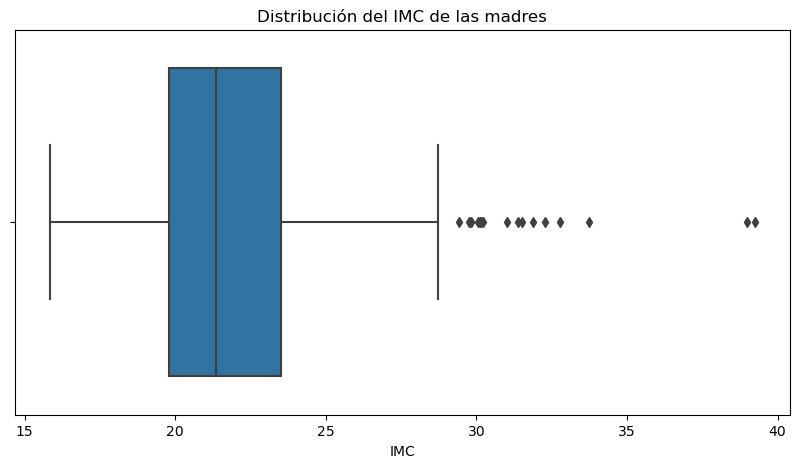

In [199]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='imc_madre', data=data)
plt.xlabel('IMC')
plt.title('Distribución del IMC de las madres')
plt.show()

*La distribución tiene una asimetría con cola hacia la derecha. Su mediana supera los 20 puntos y presenta muchos valores atípicos superiores a 28.*

Ejercicio 3. Genere una variable categórica binaria realizando la dicotomización de la variable
vinculada con el número de cigarrillos consumidos a diario, diferenciando aquellas mujeres que no
fuman habitualmente (no consumen cigarrillos) de aquellas que sí lo hacen (consumen 1 o más
cigarrillos diariamente). ¿Qué porcentaje de las mujeres del dataset son fumadoras?

In [244]:
data['fumadora'] = np.where(data['num_cigarrillos_dia'] > 0, 1, 0)
labels = {1:'fumadoras', 0:'no fumadoras'}
conteo = data['fumadora'].value_counts().sort_index()

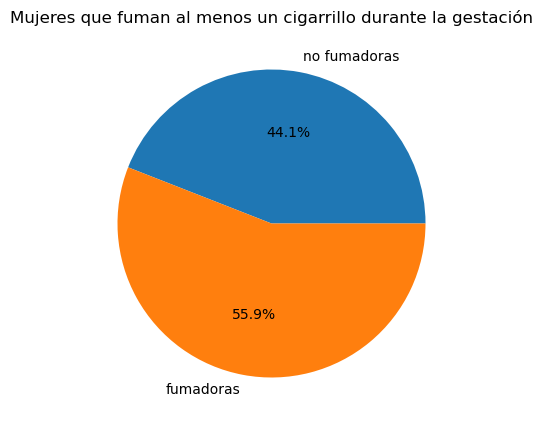

In [264]:
plt.figure(figsize=(5,5))
plt.pie(conteo,
    labels=[labels[i] for i in conteo.index],
    autopct='%1.1f%%')
plt.title('Mujeres que fuman al menos un cigarrillo durante la gestación')
plt.show()

Ejercicio 4. Represente gráficamente la distribución del peso de los recién nacidos en función del
carácter o no de fumadora de la madre (variable generada en el ítem anterior). Comente brevemente
lo observado.

In [268]:
peso_relac_fum = data[['peso_kg_bebe', 'fumadora']]

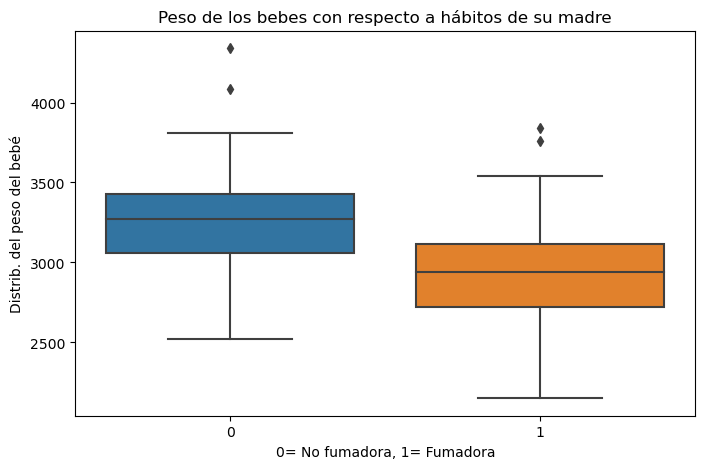

In [282]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fumadora', y='peso_kg_bebe', data=peso_relac_fum)
plt.title('Peso de los bebes con respecto a hábitos de su madre')
plt.ylabel('Distrib. del peso del bebé')
plt.xlabel('0= No fumadora, 1= Fumadora')
plt.show()

*El rango intercuartílico de ambos boxplot son muy similares. Sin embargo, si se observa el eje y, destaca el hecho de que el peso de los bebes de madres fumadoras (o que fuman al menos un cigarrillo por día) varía en valores mucho menores al de los bebes de madres que no fuman.*

Ejercicio 5. Realice un gráfico que le permita caracterizar el grado de asociación lineal que existe
entre las diferentes variables cuantitativas estudiadas. ¿Cuáles son los pares de variables que presentan
una asociación lineal más intensa? Justifique.

<Axes: >

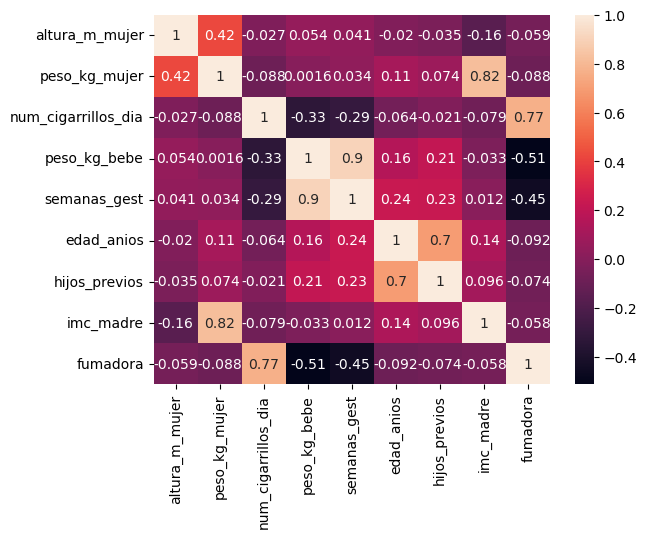

In [287]:
sns.heatmap(data[['altura_m_mujer', 'peso_kg_mujer', 'num_cigarrillos_dia', 'peso_kg_bebe', 'semanas_gest', 'edad_anios', 'hijos_previos', 'imc_madre', 'fumadora']].corr(), annot=True)

Entre los pares de variables con más asociación lineal se destacan:

Correlaciones positivas:
- peso_kg_mujer y imc_madre (0.82): cuanto más peso tiene la madre, mayor será su IMC.
- semanas_gest y peso_kg_bebe (0.9): cuanto más semanas de gestación pasan, mayor es el peso del bebé.
- edad_anios y hijos_previos (0.7): cuanto más grande en edad es la mujer, mayor es la probabilidad de que tenga más hijos previos.

Correlaciones negativas:
- peso_kg_bebe y num_cigarrillos_dia (-0.33): cuanto más cigarrillos fume la madre, menor es el peso del bebé.
- fumadora y peso_kg_bebe (-0.51): esta correlación afirma lo dicho en el punto anterior.
- fumadora y semanas_gest (-0.45): las semanas de gestación son menores cuanto más fume la madre.

____________________________

In [292]:
data.columns

Index(['id', 'altura_m_mujer', 'peso_kg_mujer', 'num_cigarrillos_dia',
       'peso_kg_bebe', 'semanas_gest', 'edad_anios', 'hijos_previos',
       'imc_madre', 'fumadora'],
      dtype='object')

In [302]:
data_modelo = data[['peso_kg_bebe', 'semanas_gest', 'hijos_previos', 'edad_anios', 'imc_madre', 'fumadora']]

In [310]:
import statsmodels.api as sm

In [306]:
x = data_modelo [['semanas_gest', 'hijos_previos', 'edad_anios', 'imc_madre', 'fumadora']]
y = data_modelo[['peso_kg_bebe']]

In [312]:
x = sm.add_constant(x)

In [314]:
model = sm.OLS(y, x).fit()

In [316]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           peso_kg_bebe   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     356.2
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          1.50e-132
Time:                        13:59:36   Log-Likelihood:                -2177.1
No. Observations:                 345   AIC:                             4366.
Df Residuals:                     339   BIC:                             4389.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1531.1921    156.252     -9.799      0.000   -1838.538   -1223.846
semanas_gest    125.5327      3.707     33.866      0.000     118.242     132.824
hijos_previos    17.2778      5.755      3.002      0.003       5.959      28.597
edad_anios       -6.5742      1.779     -3.696      0.000     -10.073      -3.075
imc_madre        -4.2835      2.100     -2.040      0.042      -8.413      -0.154
fumadora        -93.1241     16.336     -5.701      0.000    -125.256     -60.992
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.051
Skew:                           0.119   Prob(JB):                        0.591
Kurtosis:                       3.129   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Ajuste el modelo completo, incluyendo la totalidad de las variables predictoras de interés.**
¿Cuál/es de las variables incluidas contribuye/n significativamente a explicar las diferencias
en el peso promedio de los recién nacidos con un nivel de significación del 1%? Justifique.

*Si se observa la tabla relacionada a los coeficientes, la única variable elegida que sobrepasa el nivel de significación pedida es imc_madre. El resto son muy significativas para explicar el peso de los recién nacidos. En un nivel un poco menor (si bien sigue siendo significativa) se coloca hijos_previos ya que alcanza 0.003.*

**Si a partir de su respuesta en el ítem anterior considera la posibilidad de ajustar un nuevo
modelo que incluya menos variables predictoras que el modelo completo, realice el ajuste**. De lo
contrario, pase al ítem siguiente.

In [325]:
modelo_ajus = data[['peso_kg_bebe', 'semanas_gest', 'hijos_previos', 'edad_anios', 'fumadora']]

In [327]:
x2 = modelo_ajus[['semanas_gest', 'hijos_previos', 'edad_anios', 'fumadora']]
y2 = modelo_ajus[['peso_kg_bebe']]

In [329]:
x2 = sm.add_constant(x2)

In [331]:
model_ajust = sm.OLS(y2, x2).fit()

In [339]:
model_ajust.summary() # se logró un nivel de R-squared un poco más alejado de 1 pero no es un cambio tan notorio

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           peso_kg_bebe   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     440.1
Date:                Thu, 12 Jun 2025   Prob (F-statistic):          5.28e-133
Time:                        14:17:35   Log-Likelihood:                -2179.2
No. Observations:                 345   AIC:                             4368.
Df Residuals:                     340   BIC:                             4388.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1630.9673    149.089    -10.940      0.000   -1924.221   -1337.714
semanas_gest    125.8830      3.720     33.840      0.000     118.566     133.200
hijos_previos    17.2081      5.781      2.977      0.003       5.837      28.580
edad_anios       -6.9303      1.778     -3.897      0.000     -10.428      -3.432
fumadora        -91.0670     16.380     -5.560      0.000    -123.286     -58.848
==============================================================================
Omnibus:                        1.924   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.650
Skew:                           0.139   Prob(JB):                        0.438
Kurtosis:                       3.195   Cond. No.                         983.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Escriba la ecuación del modelo ajustado en forma desarrollada e interprete el valor del coeficiente
estimado por el modelo para la variable semanas de gestación**.

*Se usan los coeficientes obtenidos en el último modelo:*

peso_kg_bebe = -1630.97 + 125.88(sem_gest) + 17.21 (hijos_previos) - 6.93 (edad_anios)- 91.07 (fumadora)

*El modelo estima 125.88 como valor de las semanas de gestación. Esto quiere decir que por semana el feto debería aumentar un poco menos de 126 gramos.*

**Una médica quiere estimar el peso al nacer que tendrá un bebé que dará a luz una madre primeriza no fumadora de 25 años, que posee un índice de masa corporal de 19.5 kg/m2, luego de un total de 38 semanas de gestación. Utilice el último modelo ajustado para informarle un peso estimado.**

In [356]:
peso_estimado = -1630.97 + 125.88*38 + 17.21*0 - 6.93*25 - 91.07*0
print(f"Peso estimado sin considerar IMC de la madre: {round(peso_estimado, 2)}")

Peso estimado sin considerar IMC de la madre: 2979.22


peso_estimado_imc = −1531.1921 + 125.5327(semanas_gest) + 17.2778(hijos_previos) − 6.5742(edad_anios) - 4.2835 (imc) − 93.1241(fumadora)

In [364]:
peso_estimado_imc = -(1531.1921)+125.5327*38+17.2778*0-6.5742*25-4.2835*19.5-93.1241*0
print(f"Peso estimado, considerando el IMC de la madre: {round(peso_estimado_imc, 2)}")

Peso estimado, considerando el IMC de la madre: 2991.17


**Represente gráficamente la distribución de los residuos del modelo y comente brevemente las
características que observa**.

In [367]:
y_pred = model.fittedvalues
residuos = model.resid

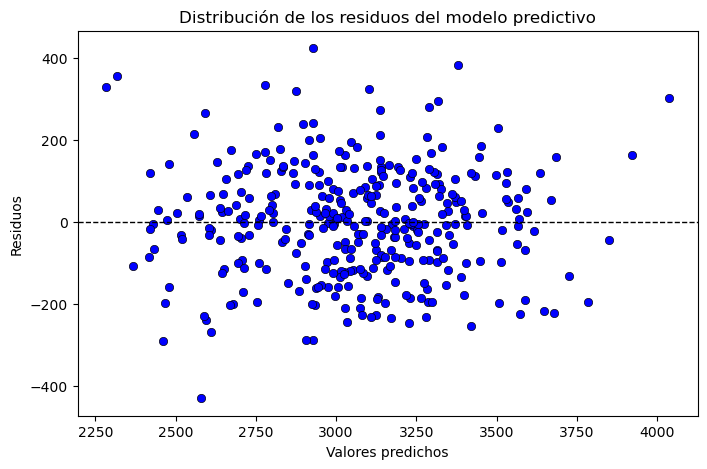

In [375]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos, color='blue', edgecolor='black')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Distribución de los residuos del modelo predictivo')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.show()

Teniendo en cuenta el gráfico, no se observa una tendencia en particular entre los residuos, ya que estan dispersos de manera aparentemente aleatoria. Asimismo, parece que esta dispersión puede ser constante, no hay abanicos.